In [1]:
# PCA
# N개의 M차원 데이터가 있으면 보통 그 데이터들은 서로 다른 값을 가짐 -> 특정한 규칙에 의해
# 이러한 데이터 간의 변이 규칙을 찾아낼 때 PCA를 이용할 수 있음

# 고차원 데이터 집합이 주어졌을 때 원래의 고차원 데이터와 가장 비슷하면서 더 낮은 차원 데이터를 찾아내는 것

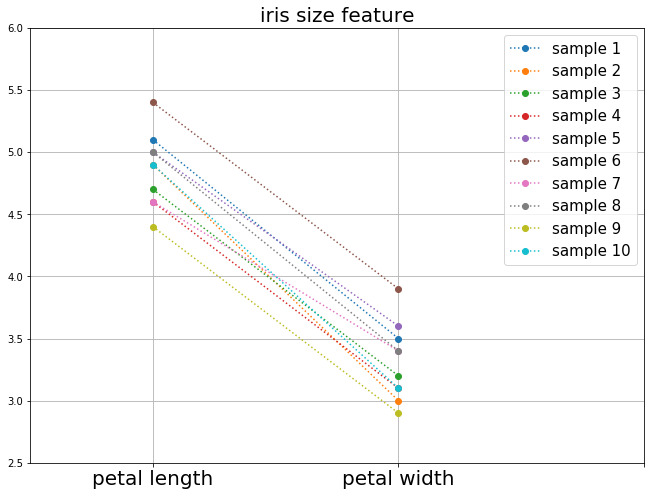

In [2]:
# 예제 1) 붓꽃 데이터의 차원 축소

# A) 붓꽃 데이터 중에서 10송이의 데이터만 선택# 예제 1) 붓꽃 데이터의 차원 축소해서 꽃받침 길이와 꽃받침 폭 데이터 그래프 시각화

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
N = 10
X = iris.data[:N, :2]

plt.figure(figsize=(11, 8))
plt.plot(X.T, 'o:')
plt.xticks(range(4), ['petal length', 'petal width'], fontsize=20)
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title('iris size feature', fontsize=20)
plt.grid(True)
plt.legend(['sample {}'.format(i+1) for i in range(N)], fontsize=15)

plt.show()

In [3]:
# 위 그래프에서 꽃받침의 길이가 크면 꽃받침의 폭도 같이 커짐을 알 수 있음

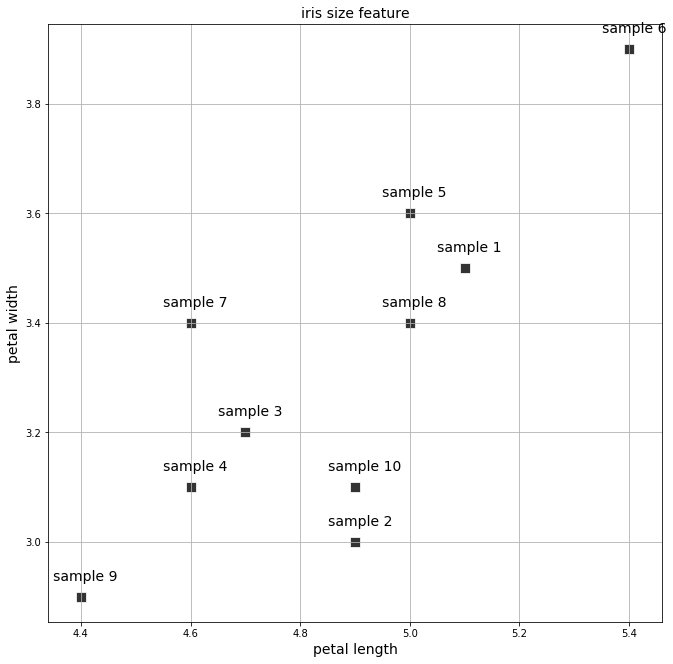

In [4]:
import seaborn as sns
import pandas as pd

plt.figure(figsize=(11, 11))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "sample {}".format(i+1), fontsize=14)
    
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("iris size feature", fontsize=14)
plt.axis("equal")
plt.grid(True)
plt.show()

In [5]:
# 위 그래프를 통해 꽃받침의 길이가 크면 꽃받침의 폭도 같이 커진다는 규칙을 알 수 있음

# 꽃받침의 길이가 크면 꽃받침 폭도 커지며 그 비율은 거의 일정한데, 그 이유는 (꽃받침 길이, 꽃받침 폭)이라는
# 2차원 측정 데이터는 사실 "꽃의 크기"라는 근본적인 데이터가 두 개의 다른 형태로 표현된 것에 지나지 않기 때문이다.
# 바로 측정되지는 않지만 측정된 데이터의 기저에 숨어서 측정 데이터를 결정짓는 데이터를 '잠재변수'라 한다.

# PCA에서는 잠재변수와 측정 데이터가 선형적인 관계로 연결되어 있다고 가정한다.

In [6]:
# 차원축소문제는 다차원 벡터를 더 낮은 벡터공간에 투영하면서 로우-랭크 근사 문제가 된다.
# N개의 데이터를 1차원 직선에 투영하는 문제라고 하면 원점을 지나는 직선을 찾는게 아니라 
# 원점이 아닌 어떤 점 x0를 지나는 직선을 찾는 문제

# PCA의 목표는 변환 결과인 차원축소 벡터 x'i의 정보가 원래의 벡터 xi가 가졌던 정보와 가장 유사하게 되는
# 변환행렬 W값을 찾는 것이다.

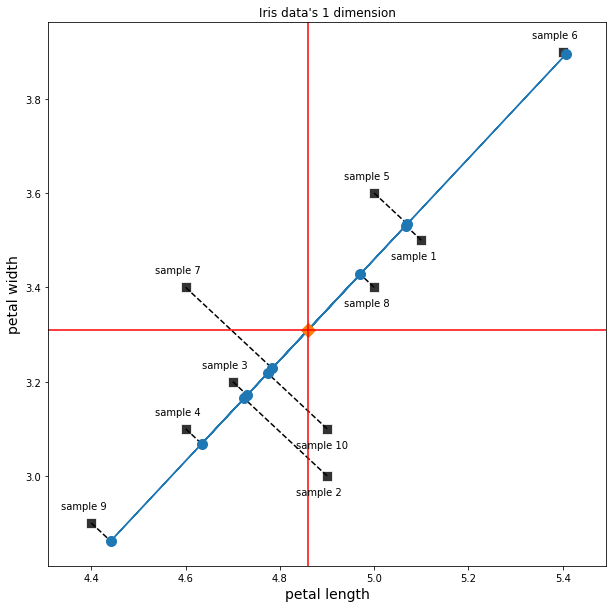

In [7]:
# 붓꽃 데이터를 1차원으로 차원 축소
from sklearn.decomposition import PCA

pca1 = PCA(n_components=1)
X_low = pca1.fit_transform(X) # 1차원 근사 데이터 집합
X2 = pca1.inverse_transform(X_low) # 다시 2차원으로 복귀한 근사 데이터 집합(정보의 손실)

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i+1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
    
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")

plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(False)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)

plt.title("Iris data's 1 dimension")
plt.axis("equal")
plt.show()

In [8]:
# PCA의 평균값
pca1.mean_

array([4.86, 3.31])

In [9]:
# PCA의 단위기저벡터
pca1.components_

array([[0.68305029, 0.73037134]])

In [10]:
# 위의 값은 평균을 제거한 특징행렬의 첫 번째 오른쪽 특이벡터 또는 그 행렬의 분산행렬의 첫 번째(가장 큰 고윳값에 대응하는)
# 고유벡터이다.

# 넘파이로 구한 첫 번째 오른쪽 특이벡터
import numpy as np

X0 = X - X.mean(axis=0)
U, S, Vt = np.linalg.svd(X0)

Vt

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [11]:
Vt[:, 0]

array([-0.68305029, -0.73037134])

In [12]:
# 고윳값 분해
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [13]:
W

array([0.17107711, 1.44192289])

In [14]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [15]:
V[:, np.argmax(W)]

array([-0.68305029, -0.73037134])

In [16]:
# 8번째 꽃받침 길이와 꽃받침 폭
X[7, :]

array([5. , 3.4])

In [17]:
# PCA로 구한 주성분의 값 즉, 꽃의 크기
X_low[7]

array([0.16136046])

In [18]:
# 이 주성분값을 이용하여 다시 2차원 값으로 나타낸 근사값
X2[7, :]

array([4.97021731, 3.42785306])

In [19]:
# B) 붓꽃 데이터 중에서 50송이의 데이터(setosa)만 선택해서 꽃잎의 길이와 꽃잎의 폭을 이용하여
#    1차원 PCA를 수행하라. 꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형 조합으로 나타나는가?

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

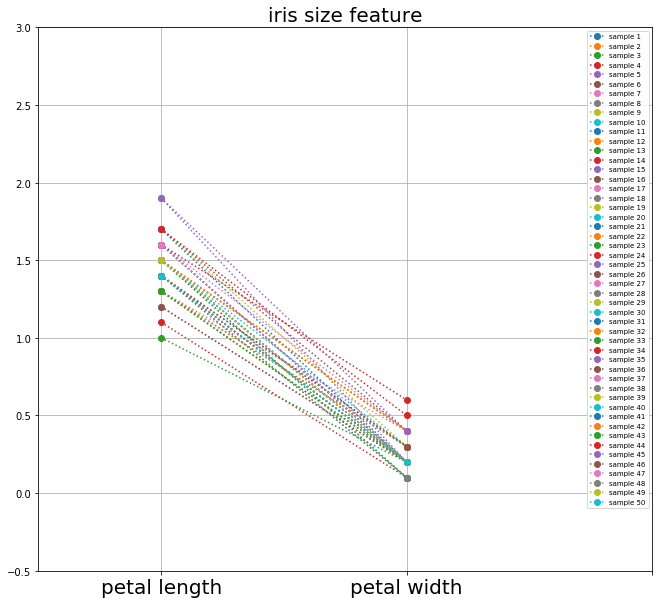

In [54]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris() # sepal: 꽃받침, petal: 꽃잎
print(iris.DESCR)
N = 50
X = iris.data[:N, 2:] # 꽃잎의 길이와 폭만 선택(50송이만 선택)
y = iris.target

y = y[(y == 0)] # setosa만 target

plt.figure(figsize=(11, 10))
plt.plot(X.T, 'o:')
plt.xticks(range(4), ['petal length', 'petal width'], fontsize=20)
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 3)
plt.title('iris size feature', fontsize=20)
plt.grid(True)
plt.legend(['sample {}'.format(i+1) for i in range(N)], fontsize=7)

plt.show()

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca_reduced = pca.fit_transform(X)
X_pca_inverse_reduced =  pca.inverse_transform(X_pca_reduced)

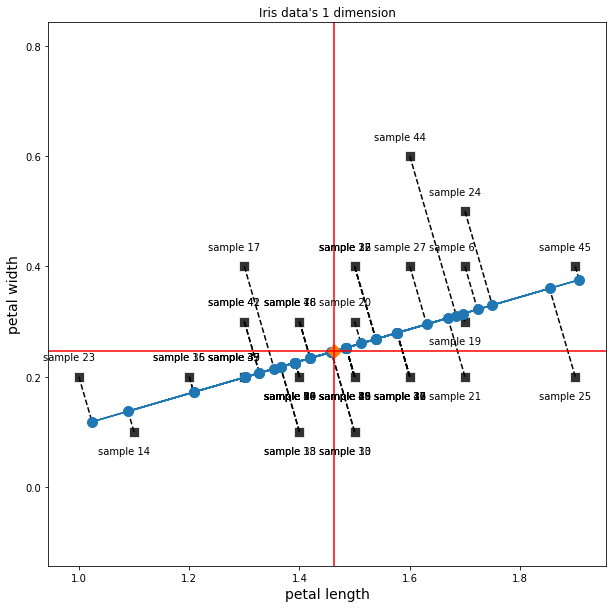

In [57]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")

for i in range(N):
    d = 0.03 if X[i, 1] > X_pca_inverse_reduced[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i+1))
    plt.plot([X[i, 0], X_pca_inverse_reduced[i, 0]], [X[i, 1], X_pca_inverse_reduced[i, 1]], "k--")
    
plt.plot(X_pca_inverse_reduced[:, 0], X_pca_inverse_reduced[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")

plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(False)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)

plt.title("Iris data's 1 dimension")
plt.axis("equal")
plt.show()

In [65]:
pca.mean_

array([1.462, 0.246])

In [67]:
pca.components_

array([[0.96004653, 0.27984043]])

In [68]:
X_pca_inverse_reduced[7, :]

array([1.48466584, 0.25260678])

In [69]:
X_pca_reduced[7]

array([0.02360911])

In [ ]:
# C) 붓꽃 데이터 중에서 50송이의 데이터(setosa)만 선택해서 꽃잎의 길이와 폭, 꽃받침의 길이와 폭, 
#    이 4가지 변수를 모두 사용하여 1차원 PCA를 수행하라. 꽃의 크기는 관측 데이터의 어떤 선형 조합으로 나타나는가?

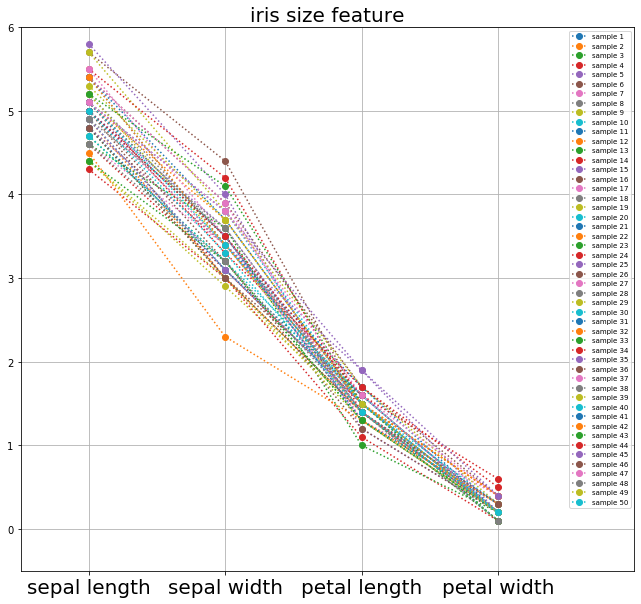

In [75]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris() # sepal: 꽃받침, petal: 꽃잎

N = 50
X = iris.data[:N] # 꽃잎의 길이와 폭만 선택(50송이만 선택)
y = iris.target

y = y[(y == 0)] # setosa만 target

plt.figure(figsize=(11, 10))
plt.plot(X.T, 'o:')
plt.xticks(range(4), ['sepal length', 'sepal width', 'petal length', 'petal width'], fontsize=20)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 6)
plt.title('iris size feature', fontsize=20)
plt.grid(True)
plt.legend(['sample {}'.format(i+1) for i in range(N)], fontsize=7)

plt.show()

In [85]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [86]:
pca = PCA(n_components=0.95) # 보존하려는 분산의 비율 95%
X_reduced = pca.fit_transform(X)

In [88]:
pca.explained_variance_ratio_

array([0.7647237 , 0.11939924, 0.0866625 ])

Text(0, 0.5, 'variance ratio')

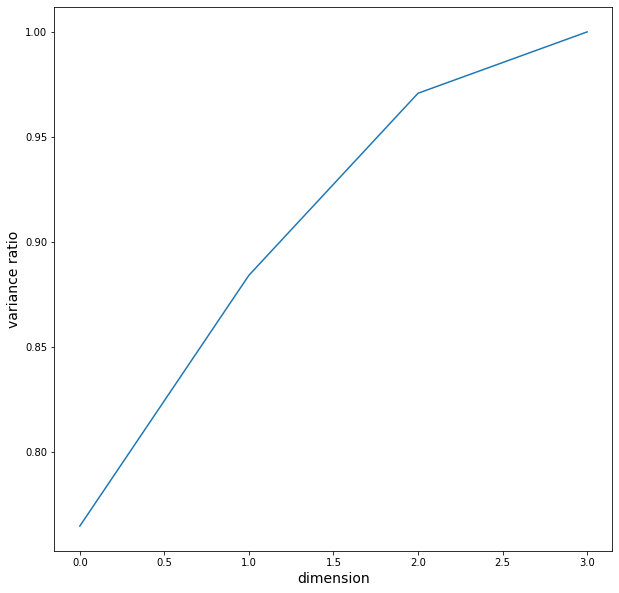

In [89]:
plt.figure(figsize=(10, 10))
plt.plot(cumsum)
plt.xlabel("dimension", fontsize=14)
plt.ylabel("variance ratio", fontsize=14)

C:\Users\daumsoft\AppData\Local\Continuum\anaconda3\envs\JMH\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


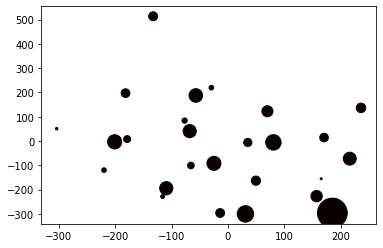

In [99]:
from sklearn.manifold import TSNE

X_tsne_reduced = TSNE(n_components=3, random_state=42).fit_transform(X)

plt.scatter(X_tsne_reduced[:, 0], X_tsne_reduced[:, 1], X_tsne_reduced[:, 2], c=y, cmap=plt.cm.hot)
plt.show()

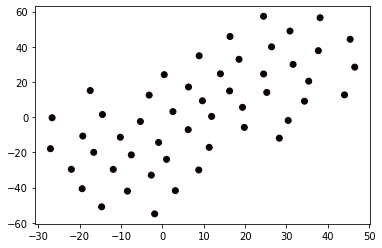

In [100]:
X_tsne_reduced2 = TSNE(n_components=2, random_state=42).fit_transform(X)

plt.scatter(X_tsne_reduced2[:, 0], X_tsne_reduced2[:, 1], c=y, cmap=plt.cm.hot)
plt.show()

In [78]:
# ui(latent variable) = w1x(i,1) + w2x(i,2) + w3x(i, 3) + w4x(i, 4)
# w1: sepal length, w2: sepal width, w3: petal length, w4: petal width

# 4차원의 데이터 -> 1차원의 데이터

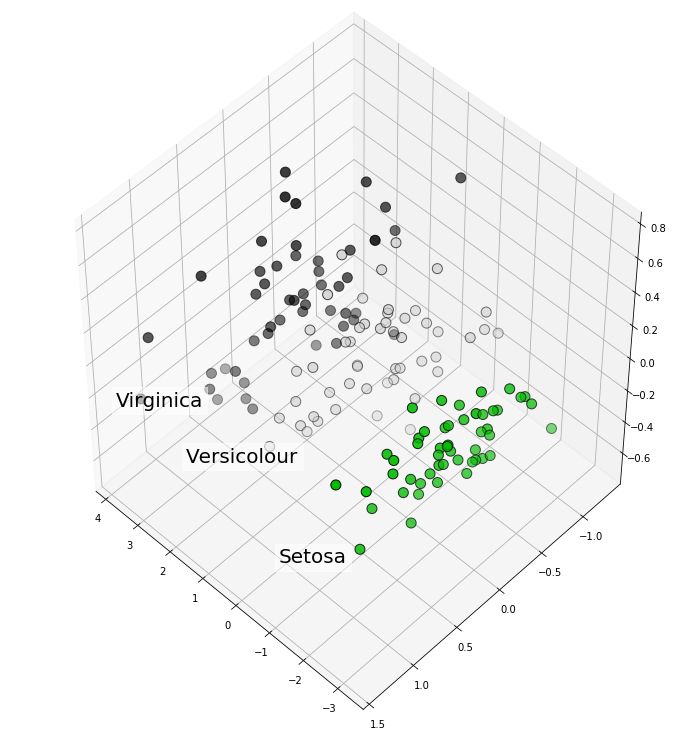

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

plt.figure(figsize=(10, 10))

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'), fontsize=20)
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, s=100,
           edgecolor='k')

# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

plt.show()

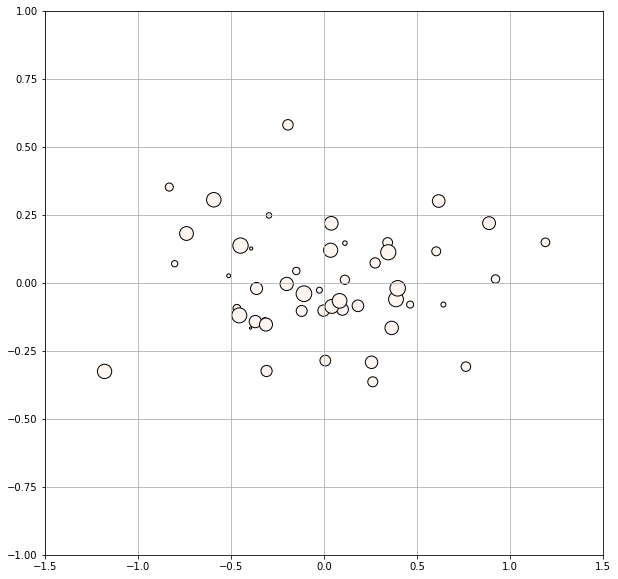

In [160]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import datasets

np.random.seed(5)

plt.figure(figsize=(10, 10))

iris = datasets.load_iris()

N = 50
X = iris.data[:N]
y = iris.target

y = y[y==0] # Setosa 종만


pca = PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
s = [5*n for n in range(len(X))]

plt.scatter(X[:, 0], X[:, 1], c=y, s=s, marker='o', cmap=plt.cm.Reds, edgecolor='k')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.0, 1)
plt.grid(True)
plt.show()

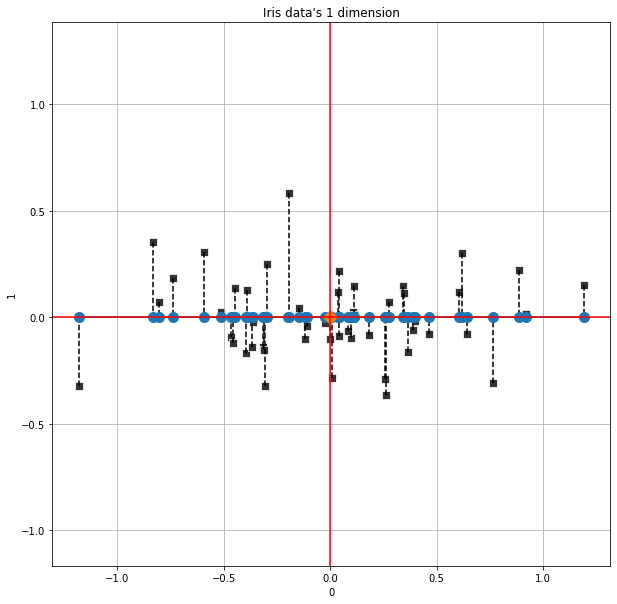

In [161]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca_reduced = pca.fit_transform(X)
X_pca_inverse_reduced =  pca.inverse_transform(X_pca_reduced)

plt.figure(figsize=(10, 10))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=50, color=".2", marker="s")

for i in range(N):
    d = 0.03 if X[i, 1] > X_pca_inverse_reduced[i, 1] else -0.04
#     ax.text(X[i, 0] - 0.065, X[i, 1] + d, "sample {}".format(i+1))
    plt.plot([X[i, 0], X_pca_inverse_reduced[i, 0]], [X[i, 1], X_pca_inverse_reduced[i, 1]], "k--")
    
plt.plot(X_pca_inverse_reduced[:, 0], X_pca_inverse_reduced[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")

plt.axvline(X[:, 0].mean(), c="r")
plt.axhline(X[:, 1].mean(), c="r")
plt.grid(True)

plt.title("Iris data's 1 dimension")
plt.axis("equal")
plt.show()

In [165]:
pca.explained_variance_ratio_

array([0.86495177])